# Task 2

## Import Libraries

In [1]:
import sys
sys.path.append('../src')

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
from datetime import datetime

from environment_gym import TrafficEnvironment
from task2_environment import CustomTrafficEnvironment
from task2_agents import RuleBasedAgent, TemporalDifference
from visualization import extract_timesteps_from_json, create_visualization_from_cached_data

seed = 2024
training_seed = 42

c:\Users\danie\OneDrive - Singapore Management University\SMU Singapore\Academics\Aug 2024\CS609_ReinforcementLearning\Project\LaneSwitchRL-Simulation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Rule-Based Agent

### Fastest Adjacent Lane

100%|██████████| 500/500 [00:55<00:00,  8.94it/s]


Truncated episodes: 139
Average cumulative rewards for Fastest Adjacent Lane strategy: -492
Average timesteps to termination for Fastest Adjacent Lane strategy: 358


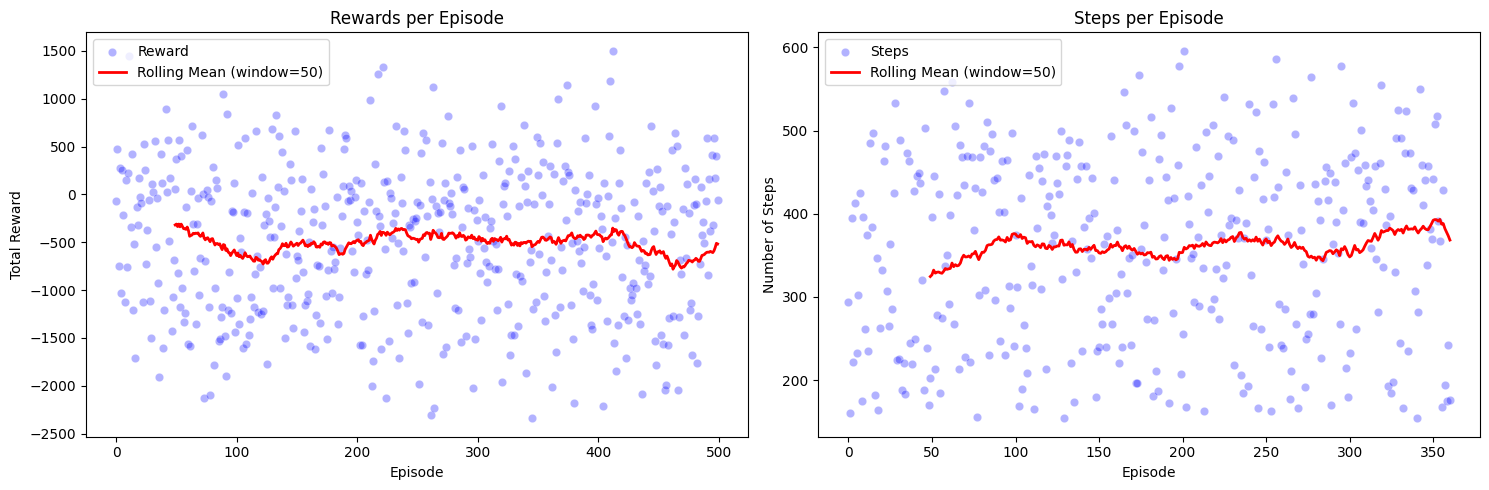

In [2]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
# Evaluate each strategy
rewards_dict = {}
timesteps_dict = {}

agent = RuleBasedAgent(env=env, strategy='fastest_adjacent')
# episode_rewards, checkpoint_rewards, timesteps_to_termination = evaluate_agent(agent, env)
all_episode_rewards, all_timesteps, fast_log_file = agent.evaluate_agent(num_episodes=500, output_file=f'./logs/task2/fast_lane/fast_lane_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')
rewards_dict['Fastest Adjacent Lane Agent'] = all_episode_rewards
timesteps_dict['Fastest Adjacent Lane Agent'] = all_timesteps
# env.logger.info("\n"*5)

print(f'Average cumulative rewards for Fastest Adjacent Lane strategy: {round(np.mean(rewards_dict['Fastest Adjacent Lane Agent']))}')
print(f'Average timesteps to termination for Fastest Adjacent Lane strategy: {round(np.mean(timesteps_dict["Fastest Adjacent Lane Agent"]))}')
agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
plt.show()

In [3]:
json_path = fast_log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 294 timesteps
GIF saved at ./gifs/task2/rule_test_log_20241106_160517.gif


### Same Lane

100%|██████████| 500/500 [01:08<00:00,  7.28it/s]


Truncated episodes: 181
Average cumulative rewards for Same Lane Agent 1: -1726
Average timesteps to termination for Same Lane Agent 1: 470




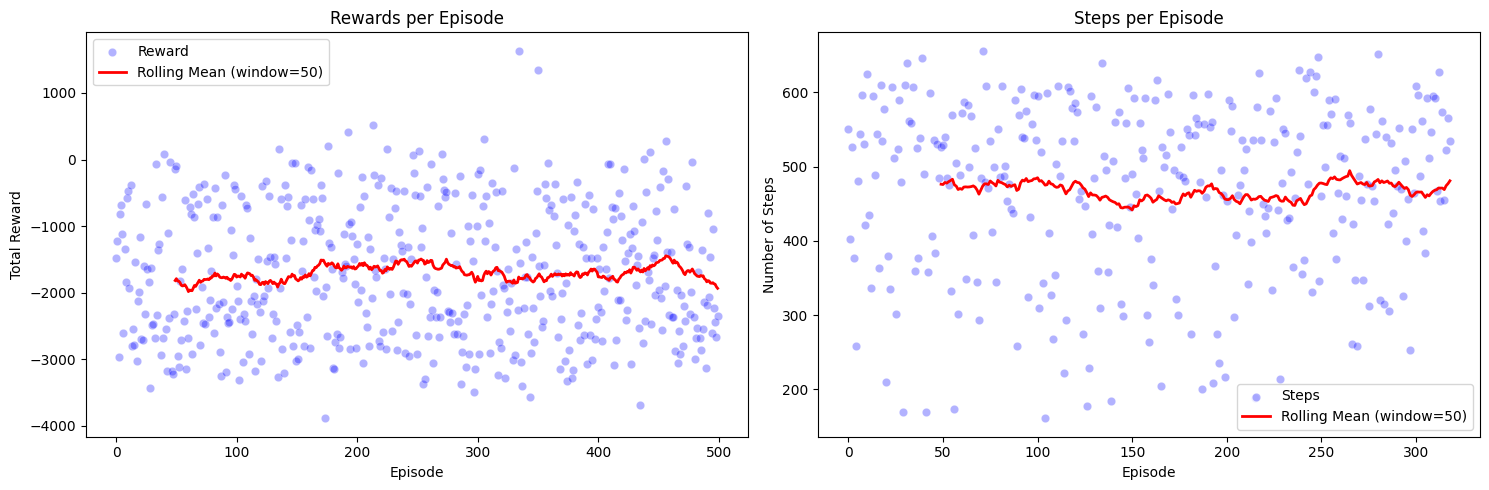

100%|██████████| 500/500 [01:10<00:00,  7.09it/s]


Truncated episodes: 184
Average cumulative rewards for Same Lane Agent 2: -2242
Average timesteps to termination for Same Lane Agent 2: 469




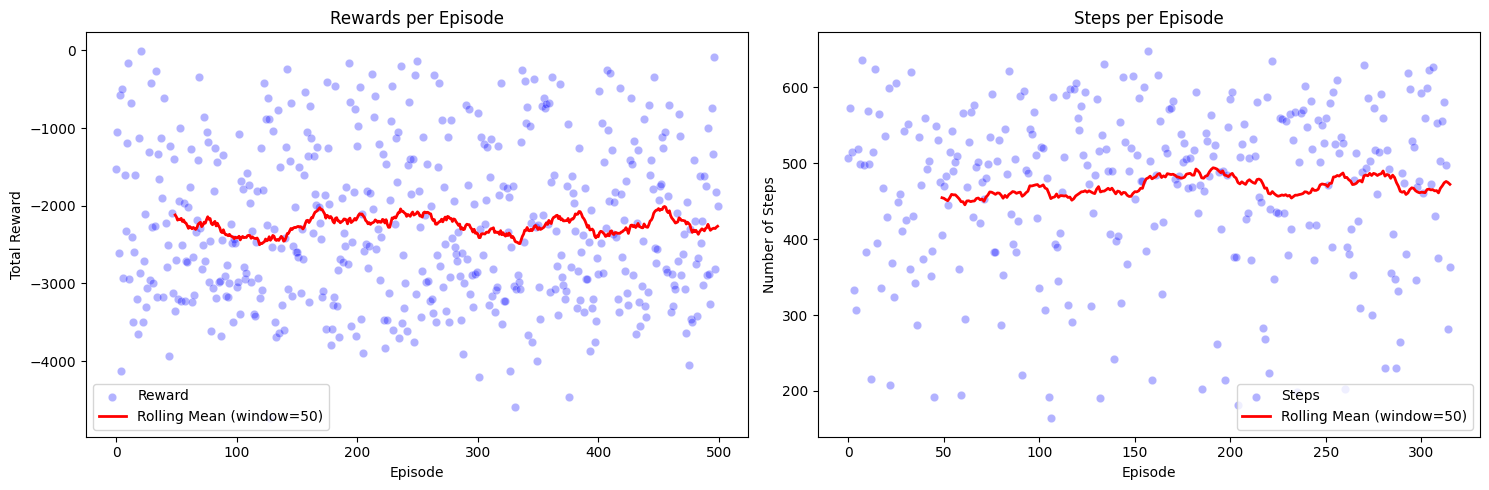

100%|██████████| 500/500 [01:09<00:00,  7.16it/s]


Truncated episodes: 177
Average cumulative rewards for Same Lane Agent 3: -2044
Average timesteps to termination for Same Lane Agent 3: 455




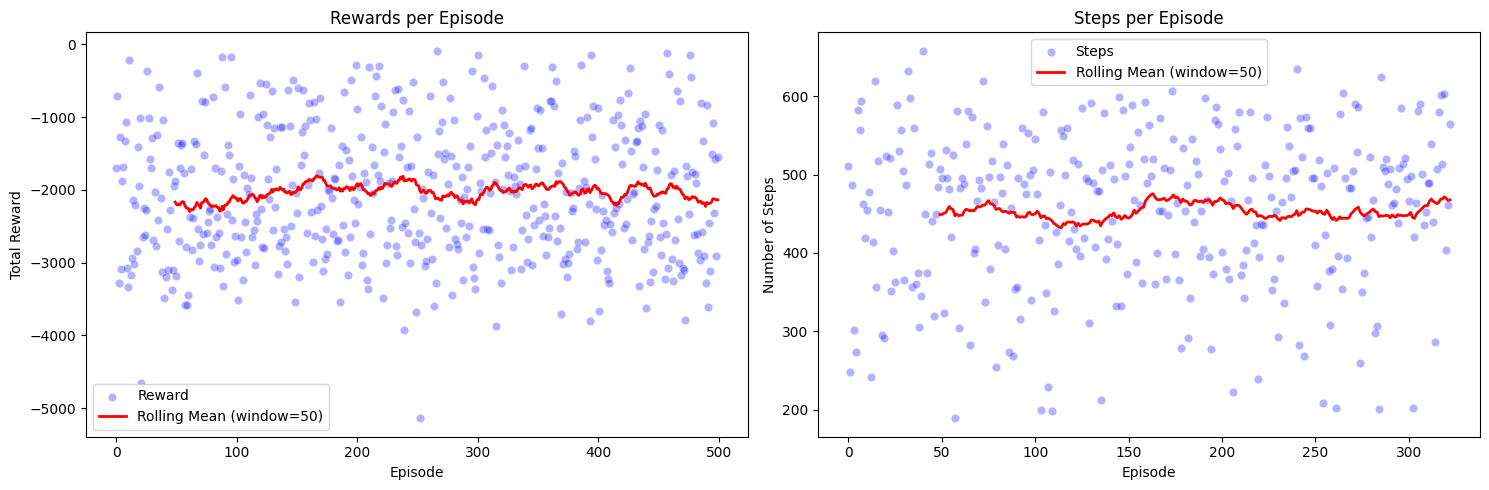

100%|██████████| 500/500 [01:38<00:00,  5.08it/s]


Truncated episodes: 180
Average cumulative rewards for Same Lane Agent 4: -2332
Average timesteps to termination for Same Lane Agent 4: 473




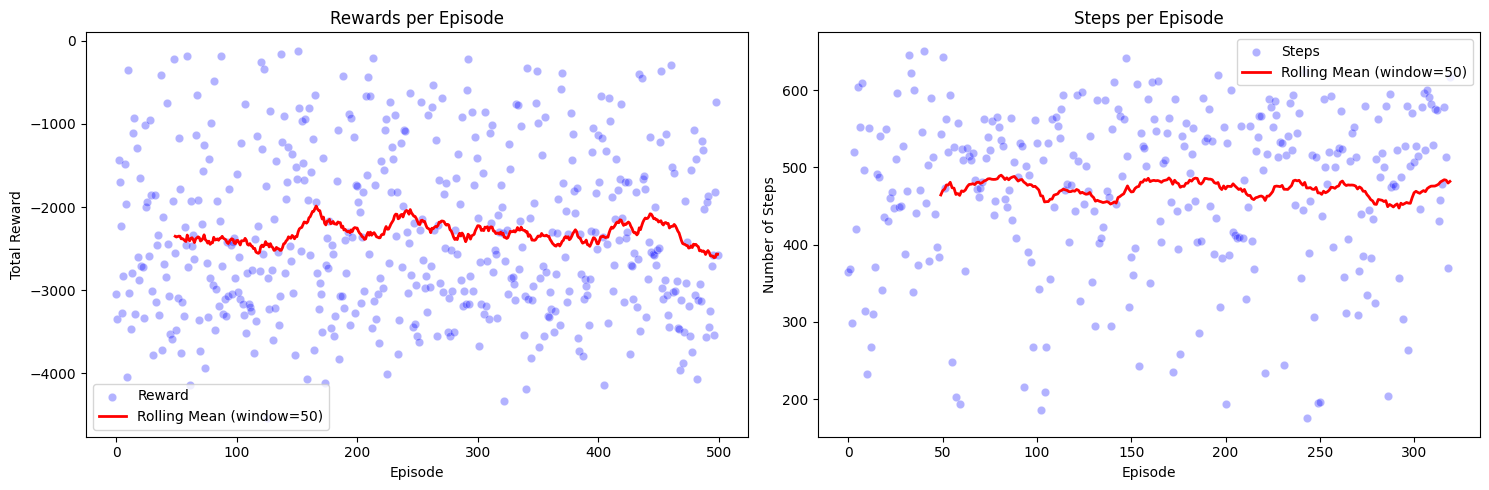

100%|██████████| 500/500 [01:13<00:00,  6.83it/s]


Truncated episodes: 183
Average cumulative rewards for Same Lane Agent 5: -1806
Average timesteps to termination for Same Lane Agent 5: 481




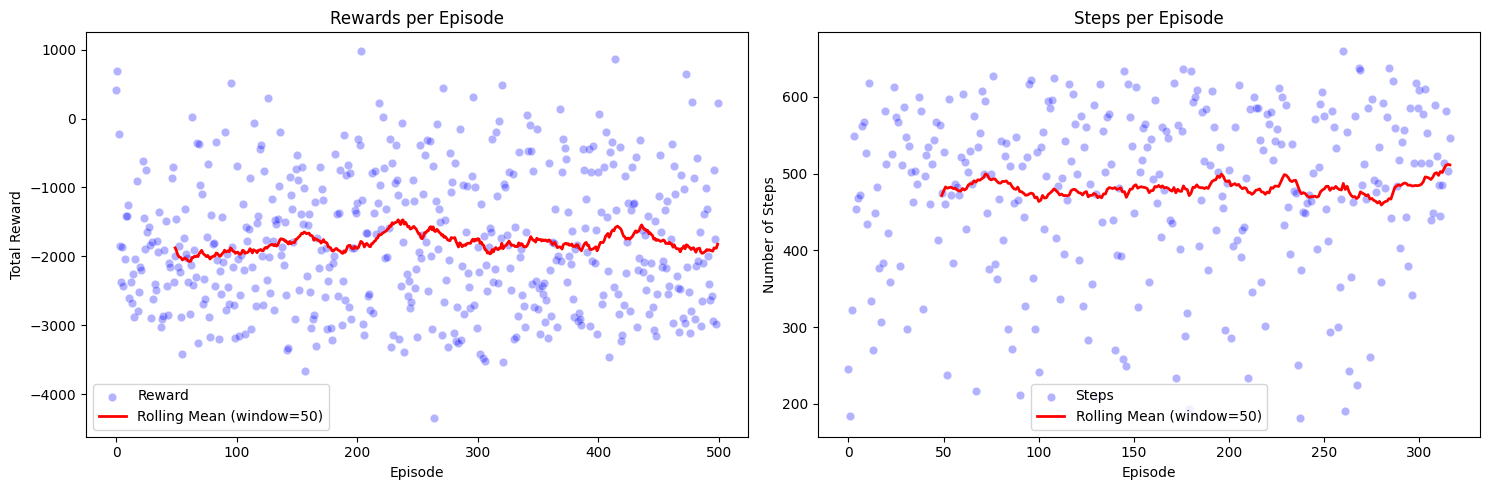

In [3]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
rewards_dict = {}
timesteps_dict = {}
log_files = []
for i in range(5):
    agent = RuleBasedAgent(env=env, strategy='stay')
    all_episode_rewards, all_timesteps, log_file = agent.evaluate_agent(num_episodes=500, starting_lane=i+1, output_file=f'./logs/task2/same_lane/rule_lane{i+1}_test_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json')
    log_files.append(log_file)
    rewards_dict[f'Same Lane Agent {i+1}'] = all_episode_rewards
    timesteps_dict[f'Same Lane Agent {i+1}'] = all_timesteps
    
    print(f'Average cumulative rewards for Same Lane Agent {i+1}: {round(np.mean(all_episode_rewards))}')
    print(f'Average timesteps to termination for Same Lane Agent {i+1}: {round(np.mean(all_timesteps))}')
    print('\n')
    agent.plot_metrics(all_episode_rewards, all_timesteps, window_size=50)
    plt.show()

In [12]:
for i in range(1):
    json_path = log_files[i]

    extract_timesteps_from_json(json_path)
    gif_filename = os.path.basename(json_path).replace('.json', '.gif')

    gif_filepath = f'./gifs/task2/{gif_filename}'

    create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 245 timesteps
GIF saved at ./gifs/task2/rule_test_log_20241106_160517.gif


## Value-based Agent

### Training

To beat: 139 accidents, 358 timesteps, Reward: -492

{'alpha': 0.005570186745951954, 'gamma': 0.5512247590348421, 'epsilon_min': 0.061269100902687786}  

In [ ]:
# Create the environment
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=training_seed)

td_lambda = TemporalDifference(env, oiv = 0.1, alpha=5e-3, epsilon=1.0, lambd=0, gamma=0.55, epsilon_decay=0.9999, epsilon_min=0.06)
# td_lambda = TemporalDifference(env, oiv = 0.1, alpha=5.5e-5, epsilon=1.0, lambd=0, gamma=0.14, epsilon_decay=0.9999, epsilon_min=0.017)
total_reward_list, total_steps_list = td_lambda.train(num_episodes = 1000, on_policy = False, save_model = False)
total_rew = sum(total_reward_list)
avg_rew = np.mean(total_reward_list)
avg_steps = np.mean(total_steps_list)

print(f'Sum of total rewards = {total_rew}')
print(f'Average total reward per episode = {avg_rew}')
print(f'Average steps per episode = {avg_steps}')

# plot training metrics
td_lambda.plot_metrics(total_reward_list, total_steps_list, window_size=50)
plt.show()

 66%|██████▌   | 660/1000 [00:49<00:25, 13.57it/s]

In [15]:
# Convert the list to a pandas Series
rewards_series = pd.Series(total_reward_list)

# Calculate the rolling average with a window size of 50
rolling_avg = rewards_series.rolling(window=50).mean()

# Find the index where the rolling average is highest
max_rolling_avg_index = rolling_avg.idxmax()

print("Index with the highest rolling average:", max_rolling_avg_index)
print("Highest rolling average:", rolling_avg[max_rolling_avg_index])

Index with the highest rolling average: 1373
Highest rolling average: -615.4800000000001


### Analysis

In [13]:
print(f'Filled State Space: {len(td_lambda.Q)}')
td_lambda.Q.items()

Filled State Space: 4401


dict_items([((5, 0, 5, 0), array([-0.07861442,  3.64430111,  0.21337632])), ((5, 5, 4, 0), array([0.10370176, 0.85865552, 0.10405185])), ((4, 5, 4, 0), array([0.28581441, 0.1       , 0.10293596])), ((4, 4, 4, 1), array([0.1028304 , 0.46245855, 0.1       ])), ((4, 4, 5, 0), array([0.11164283, 0.10896355, 0.58506957])), ((4, 4, 6, 1), array([0.10364166, 0.1       , 0.21316528])), ((6, 4, 0, 1), array([0.14788172, 0.1       , 0.09525905])), ((6, 5, 0, 1), array([0.10572176, 0.37733978, 0.1       ])), ((4, 5, 6, 2), array([0.10659462, 0.1       , 0.15038684])), ((4, 5, 5, 2), array([0.10235776, 0.35320412, 0.09549315])), ((4, 5, 5, 1), array([0.16477053, 0.10490679, 0.1       ])), ((4, 6, 4, 2), array([0.15579855, 0.1       , 0.1       ])), ((6, 0, 4, 2), array([0.07948634, 0.95643203, 0.10457836])), ((5, 0, 4, 2), array([0.06540997, 0.94848691, 0.09952755])), ((5, 0, 5, 2), array([0.05847697, 1.44562647, 0.11080095])), ((6, 0, 5, 2), array([0.07055205, 1.45321335, 0.10836108])), ((6, 6, 3

Action Distribution:
Left:  1290 (29.8%)
Stay:  1914 (44.3%)
Right: 1119 (25.9%)


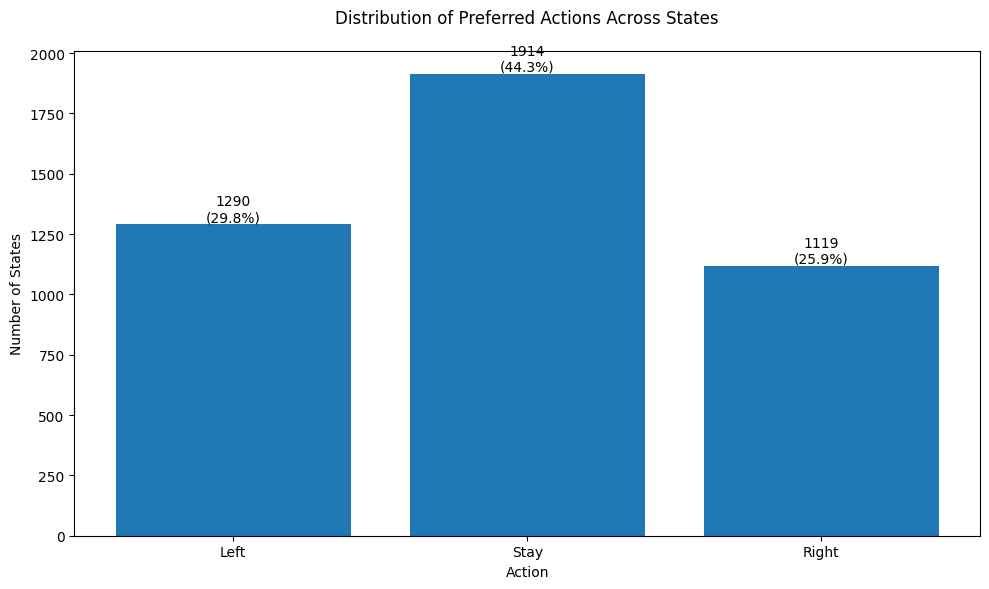

(1290, 1914, 1119, 29.840388619014576, 44.274809160305345, 25.88480222068008)

In [8]:
td_lambda.analyze_model_actions()

State Space Size = 10 x 10 x 10 (Clearance Rates) x 5 (Risk Factor) x 3 (Actions) = 15,000

In [14]:
q_df = td_lambda.q_table_to_dataframe()
q_df.head()

,Current Lane Rate,Left Lane Rate,Right Lane Rate,Risk Factor,Left,Stay,Right
0,6,5,5,0,0.102848,0.144680,0.343161
1,5,0,5,0,-0.116756,5.535768,0.989114
2,2,0,5,5,-0.917551,0.050490,-0.167447
3,5,3,5,5,0.042177,0.044816,0.051682
4,3,0,5,5,-0.102477,0.085014,0.038557


In [15]:
lanes = ['Current', 'Left', 'Right']
for fast_lane in lanes:
    other_lanes = lanes.copy()
    other_lanes.remove(fast_lane)
    total = q_df.loc[((q_df[f'{fast_lane} Lane Rate'] > q_df[f'{other_lanes[0]} Lane Rate']) & (q_df[f'{fast_lane} Lane Rate'] > q_df[f'{other_lanes[1]} Lane Rate'])) & (q_df['Risk Factor'] < 5)].shape[0]
    rate = q_df.loc[((q_df[f'{fast_lane} Lane Rate'] > q_df[f'{other_lanes[0]} Lane Rate']) & (q_df[f'{fast_lane} Lane Rate'] > q_df[f'{other_lanes[1]} Lane Rate'])) & (q_df['Risk Factor'] < 5) \
    & ((q_df[f'{fast_lane if fast_lane != 'Current' else 'Stay'}'] > q_df[f'{other_lanes[0] if other_lanes[0] != 'Current' else 'Stay'}']) \
        & (q_df[f'{fast_lane if fast_lane != 'Current' else 'Stay'}'] > q_df[f'{other_lanes[1] if other_lanes[1] != 'Current' else 'Stay'}']))].shape[0]
    rate = rate/q_df.shape[0]
    print(f"Number of cases where the {fast_lane} lane is fastest and has the highest value for low risk: {rate*100}%")

Number of cases where the Current lane is fastest and has the highest value for low risk: 23.18216366860907%
Number of cases where the Left lane is fastest and has the highest value for low risk: 5.877881935647327%
Number of cases where the Right lane is fastest and has the highest value for low risk: 5.092475297694452%


### Evaluation

In [6]:
td_lambda.Env.enable_logging()

Best: 146, 367  
141, 370, -815

100%|██████████| 500/500 [00:37<00:00, 13.33it/s]


Early terminations: 158
Average cumulative rewards for TD-Lambda Agent: -773
Average timesteps to termination for TD-Lambda Agent: 371


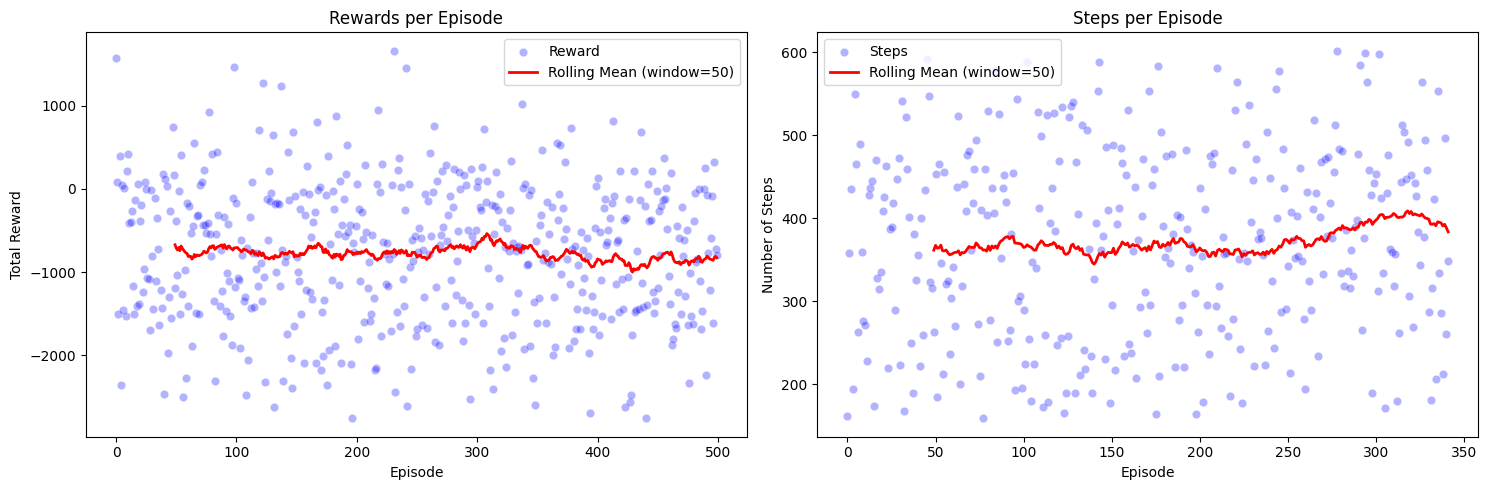

In [ ]:
# Training and evaluation using different seeds
td_lambda.Env.set_seed(seed)
td_lambda.set_seed(seed)

# Evaluate the agent in inference mode
all_rewards, all_steps, log_file = td_lambda.evaluate(num_episodes=500)

# Print the results
print(f"Average cumulative rewards for TD-Lambda Agent: {round(np.mean(all_rewards))}")
print(f"Average timesteps to termination for TD-Lambda Agent: {round(np.mean(all_steps))}")

td_lambda.plot_metrics(all_rewards, all_steps, window_size=50)
plt.show()

In [7]:
td_lambda.Env.disable_logging()

### Visualization

In [12]:
json_path = log_file

extract_timesteps_from_json(json_path)
gif_filename = os.path.basename(json_path).replace('.json', '.gif')

gif_filepath = f'./gifs/task2/{gif_filename}'

create_visualization_from_cached_data(gif_filename=gif_filepath, step_interval=1)

Timesteps data from the first line successfully cached, containing 286 timesteps
GIF saved at ./gifs/task2/test_log_tdlambda_20241106_234138.gif


### Hyperparameter Tuning

In [ ]:
episodes = 500
trials = 10
on_policy = False
hyperparameter_space = {
    'alpha': [1e-4, 1e-1],           # Learning rate range (log scale)
    'gamma': [0.1, 0.99],            # Discount factor range
    'epsilon_min': [0.01, 0.1],      # Minimum epsilon range
    # 'lambd': [0, 0.9]             # Lambda range for eligibility traces
}
env = CustomTrafficEnvironment(max_time_steps=10000, logging_enabled=False, seed=seed)
td_lambda = TemporalDifference(env)
# Run hyperparameter tuning
best_agent, best_params = td_lambda.hyperparameter_tuning(hyperparameter_space=hyperparameter_space, lambd=0, episodes=episodes, n_trials=trials, on_policy=on_policy)

[I 2024-11-06 23:54:49,482] A new study created in memory with name: no-name-8d65099a-c3bd-432f-b707-bf1ebf06ebe0
100%|██████████| 1000/1000 [28:45<00:00,  1.73s/it]
[I 2024-11-07 00:23:35,153] Trial 0 finished with value: -818.8358000000001 and parameters: {'alpha': 0.0011406257805402446, 'gamma': 0.12502235279931168, 'epsilon_min': 0.08741783799126553}. Best is trial 0 with value: -818.8358000000001.


Early Termination Count: 379
Trial 0: Average Reward = -818.84


100%|██████████| 1000/1000 [41:07<00:00,  2.47s/it]
[I 2024-11-07 01:04:42,609] Trial 1 finished with value: -764.0534 and parameters: {'alpha': 0.019068772400765644, 'gamma': 0.8107075740678905, 'epsilon_min': 0.045162823803407054}. Best is trial 1 with value: -764.0534.


Early Termination Count: 366
Trial 1: Average Reward = -764.05


100%|██████████| 1000/1000 [45:06<00:00,  2.71s/it]
[I 2024-11-07 01:49:48,927] Trial 2 finished with value: -1045.2174000000002 and parameters: {'alpha': 0.0021491548923402684, 'gamma': 0.9889233940696424, 'epsilon_min': 0.04610505456523275}. Best is trial 1 with value: -764.0534.


Early Termination Count: 360
Trial 2: Average Reward = -1045.22


100%|██████████| 1000/1000 [47:50<00:00,  2.87s/it]
[I 2024-11-07 02:37:39,242] Trial 3 finished with value: -871.253 and parameters: {'alpha': 0.00208792291719465, 'gamma': 0.5077674166542543, 'epsilon_min': 0.04863341880916179}. Best is trial 1 with value: -764.0534.


Early Termination Count: 346
Trial 3: Average Reward = -871.25


100%|██████████| 1000/1000 [48:21<00:00,  2.90s/it]
[I 2024-11-07 03:26:00,861] Trial 4 finished with value: -902.6812000000001 and parameters: {'alpha': 0.004090064273291788, 'gamma': 0.10761758186961533, 'epsilon_min': 0.06602441674860213}. Best is trial 1 with value: -764.0534.


Early Termination Count: 340
Trial 4: Average Reward = -902.68

Best Hyperparameters Found:
{'alpha': 0.019068772400765644, 'gamma': 0.8107075740678905, 'epsilon_min': 0.045162823803407054}
Best Average Reward: -764.05
